In [216]:
import pandas as pd
import nltk
from nltk import word_tokenize
import spacy
import numpy
import math
import re
from dateutil import parser
import seaborn as sns
from sklearn.model_selection import train_test_split
from datetime import datetime
from dateutil.parser import parse
import matplotlib.pyplot as plt
import dateparser

In [217]:
df = pd.read_csv("allocine_squidgame.csv");df

,Note,Description,Date,nombre_good,nombre_follow,key
0,"3,0","On s'attendait à une fin plus élaborée, claire...",Publiée le 2 octobre 2021,22\n\n\n10,Suivre son activité,0
1,"2,5",Encore une série très sur-côtée ! Tout est pré...,Publiée le 1 octobre 2021,24\n\n\n12,Suivre son activité,1
2,"4,5",Pas fan des séries coréennes en général. Je do...,Publiée le 22 septembre 2021,20\n\n\n21,Suivre son activité,2
3,"4,5","Disons le tout de suite, je suis fan depuis 30...",Publiée le 5 octobre 2021,9\n\n\n10,Suivre son activité,3
4,"4,0","Visuellement recherché, très ludique, rythmé e...",Publiée le 25 septembre 2021,7\n\n\n\n9,Suivre son activité,4
...,...,...,...,...,...,...
336,"5,0",Vraiment une des meilleures séries que j'ai vu...,Publiée le 24 octobre 2021,0\n\n\n1,Suivre son activité,10
337,"4,5",Une série qui fait réfléchir.La série met en s...,Publiée le 26 octobre 2021,0\n\n\n0,Suivre son activité,11
338,"4,0",très bonne série nous tiens en haleine du débu...,Publiée le 26 octobre 2021,0\n\n\n0,Suivre son activité,12
339,"3,5","Bonne série,je trouve que c'est une version so...",Publiée le 21 octobre 2021,0\n\n\n0,Suivre son activité,13


In [218]:
df.describe()

,key
count,341.000000
mean,6.920821
std,4.289132
min,0.000000
25%,3.000000
50%,7.000000
75%,11.000000
max,14.000000


In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Note           341 non-null    object
 1   Description    341 non-null    object
 2   Date           341 non-null    object
 3   nombre_good    341 non-null    object
 4   nombre_follow  341 non-null    object
 5   key            341 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 16.1+ KB


In [220]:
# mise au format string
df['Description'] = df['Description'].astype(str)
df.dtypes

Note             object
Description      object
Date             object
nombre_good      object
nombre_follow    object
key               int64
dtype: object

In [221]:
df = df.drop(['key', 'nombre_follow'], axis=1)

In [222]:
df['nombre_good'] = df['nombre_good'].apply(lambda x: x.replace('\n\n\n', ' '))
df['nombre_good'] = df['nombre_good'].apply(lambda x: x.replace('\n', ''))
df['Description'] = df['Description'].str.replace("\n", "");df

,Note,Description,Date,nombre_good
0,"3,0","On s'attendait à une fin plus élaborée, claire...",Publiée le 2 octobre 2021,22 10
1,"2,5",Encore une série très sur-côtée ! Tout est pré...,Publiée le 1 octobre 2021,24 12
2,"4,5",Pas fan des séries coréennes en général. Je do...,Publiée le 22 septembre 2021,20 21
3,"4,5","Disons le tout de suite, je suis fan depuis 30...",Publiée le 5 octobre 2021,9 10
4,"4,0","Visuellement recherché, très ludique, rythmé e...",Publiée le 25 septembre 2021,7 9
...,...,...,...,...
336,"5,0",Vraiment une des meilleures séries que j'ai vu...,Publiée le 24 octobre 2021,0 1
337,"4,5",Une série qui fait réfléchir.La série met en s...,Publiée le 26 octobre 2021,0 0
338,"4,0",très bonne série nous tiens en haleine du débu...,Publiée le 26 octobre 2021,0 0
339,"3,5","Bonne série,je trouve que c'est une version so...",Publiée le 21 octobre 2021,0 0


In [223]:
# On clean la date avec un regex pour sortir le "Publiée le" et garde seulement la date dans une nouvelle colonne 'Date_clean'
import dateparser
df['Date_clean'] = df['Date'].str.extract('Publiée le (\d.* .* \d.*)')


# On utilise le parser pour renvoyer un datetime dans une nouvelle colonne 'datetime'
df['datetime'] = df.apply(lambda row :dateparser.parse(row['Date_clean']) , axis = 1)





/home/greg/anaconda3/lib/python3.9/site-packages/dateparser/date_parser.py:35: PytzUsageWarning: The localize method is no longer necessary, as this time zone supports the fold attribute (PEP 495). For more details on migrating to a PEP 495-compliant implementation, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html
  date_obj = stz.localize(date_obj)


In [224]:
# On drop les colonnes dates inutiles
df.drop('Date',inplace=True,axis=1)
df.drop('Date_clean',inplace=True,axis=1);

In [225]:
df

,Note,Description,nombre_good,datetime
0,"3,0","On s'attendait à une fin plus élaborée, claire...",22 10,2021-10-02
1,"2,5",Encore une série très sur-côtée ! Tout est pré...,24 12,2021-10-01
2,"4,5",Pas fan des séries coréennes en général. Je do...,20 21,2021-09-22
3,"4,5","Disons le tout de suite, je suis fan depuis 30...",9 10,2021-10-05
4,"4,0","Visuellement recherché, très ludique, rythmé e...",7 9,2021-09-25
...,...,...,...,...
336,"5,0",Vraiment une des meilleures séries que j'ai vu...,0 1,2021-10-24
337,"4,5",Une série qui fait réfléchir.La série met en s...,0 0,2021-10-26
338,"4,0",très bonne série nous tiens en haleine du débu...,0 0,2021-10-26
339,"3,5","Bonne série,je trouve que c'est une version so...",0 0,2021-10-21


In [226]:
df[['good', 'bad']] = df['nombre_good'].str.split(' ', n=1, expand=True)

In [227]:
df['tokenize'] = df['Description'].apply(lambda x: word_tokenize(x))

In [228]:
df['Note'] = df['Note'].apply(lambda x: x.replace(',', '.'))
df['Note'] = df['Note'].astype('float64')
df

,Note,Description,nombre_good,datetime,good,bad,tokenize
0,3.0,"On s'attendait à une fin plus élaborée, claire...",22 10,2021-10-02,22,10,"[On, s'attendait, à, une, fin, plus, élaborée,..."
1,2.5,Encore une série très sur-côtée ! Tout est pré...,24 12,2021-10-01,24,12,"[Encore, une, série, très, sur-côtée, !, Tout,..."
2,4.5,Pas fan des séries coréennes en général. Je do...,20 21,2021-09-22,20,21,"[Pas, fan, des, séries, coréennes, en, général..."
3,4.5,"Disons le tout de suite, je suis fan depuis 30...",9 10,2021-10-05,9,10,"[Disons, le, tout, de, suite, ,, je, suis, fan..."
4,4.0,"Visuellement recherché, très ludique, rythmé e...",7 9,2021-09-25,7,9,"[Visuellement, recherché, ,, très, ludique, ,,..."
...,...,...,...,...,...,...,...
336,5.0,Vraiment une des meilleures séries que j'ai vu...,0 1,2021-10-24,0,1,"[Vraiment, une, des, meilleures, séries, que, ..."
337,4.5,Une série qui fait réfléchir.La série met en s...,0 0,2021-10-26,0,0,"[Une, série, qui, fait, réfléchir.La, série, m..."
338,4.0,très bonne série nous tiens en haleine du débu...,0 0,2021-10-26,0,0,"[très, bonne, série, nous, tiens, en, haleine,..."
339,3.5,"Bonne série,je trouve que c'est une version so...",0 0,2021-10-21,0,0,"[Bonne, série, ,, je, trouve, que, c'est, une,..."


/home/greg/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='datetime', ylabel='Note'>

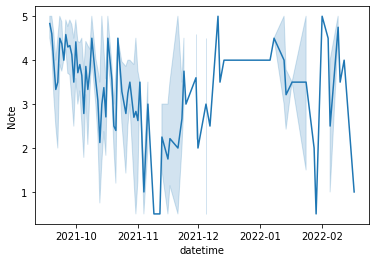

In [229]:
sns.lineplot(df['datetime'],df['Note'], sort=True)

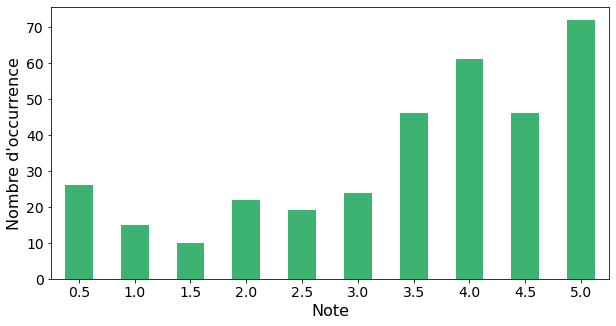

In [230]:
plt.figure(figsize=(10,5))

df['Note'].value_counts().sort_index().plot(kind='bar', color='mediumseagreen')

plt.xticks(rotation=0, fontsize=14)

plt.yticks(fontsize=14)

plt.xlabel('Note', fontsize=16)

plt.ylabel('Nombre d\'occurrence', fontsize=16)

plt.show()

In [231]:
df["Sentiment"] = df['Note'].apply(lambda x: 0 if x<4 else 1)


In [232]:
# Suppression ponctuation
#df['Description'] = df['Description'].map(lambda x : re.sub('[,\.!?]','',x)).map(lambda x : re.sub('\d', '', x))

In [233]:
df

,Note,Description,nombre_good,datetime,good,bad,tokenize,Sentiment
0,3.0,"On s'attendait à une fin plus élaborée, claire...",22 10,2021-10-02,22,10,"[On, s'attendait, à, une, fin, plus, élaborée,...",0
1,2.5,Encore une série très sur-côtée ! Tout est pré...,24 12,2021-10-01,24,12,"[Encore, une, série, très, sur-côtée, !, Tout,...",0
2,4.5,Pas fan des séries coréennes en général. Je do...,20 21,2021-09-22,20,21,"[Pas, fan, des, séries, coréennes, en, général...",1
3,4.5,"Disons le tout de suite, je suis fan depuis 30...",9 10,2021-10-05,9,10,"[Disons, le, tout, de, suite, ,, je, suis, fan...",1
4,4.0,"Visuellement recherché, très ludique, rythmé e...",7 9,2021-09-25,7,9,"[Visuellement, recherché, ,, très, ludique, ,,...",1
...,...,...,...,...,...,...,...,...
336,5.0,Vraiment une des meilleures séries que j'ai vu...,0 1,2021-10-24,0,1,"[Vraiment, une, des, meilleures, séries, que, ...",1
337,4.5,Une série qui fait réfléchir.La série met en s...,0 0,2021-10-26,0,0,"[Une, série, qui, fait, réfléchir.La, série, m...",1
338,4.0,très bonne série nous tiens en haleine du débu...,0 0,2021-10-26,0,0,"[très, bonne, série, nous, tiens, en, haleine,...",1
339,3.5,"Bonne série,je trouve que c'est une version so...",0 0,2021-10-21,0,0,"[Bonne, série, ,, je, trouve, que, c'est, une,...",0


In [234]:
#stemming

from nltk.stem.snowball import FrenchStemmer
stemmer = FrenchStemmer()
df['Stemming'] = df.tokenize.apply(lambda x: [stemmer.stem(item) for item in x])
df


,Note,Description,nombre_good,datetime,good,bad,tokenize,Sentiment,Stemming
0,3.0,"On s'attendait à une fin plus élaborée, claire...",22 10,2021-10-02,22,10,"[On, s'attendait, à, une, fin, plus, élaborée,...",0,"[on, s'attend, à, une, fin, plus, élabor, ,, c..."
1,2.5,Encore une série très sur-côtée ! Tout est pré...,24 12,2021-10-01,24,12,"[Encore, une, série, très, sur-côtée, !, Tout,...",0,"[encor, une, ser, tres, sur-côt, !, tout, est,..."
2,4.5,Pas fan des séries coréennes en général. Je do...,20 21,2021-09-22,20,21,"[Pas, fan, des, séries, coréennes, en, général...",1,"[pas, fan, de, ser, coréen, en, général, ., je..."
3,4.5,"Disons le tout de suite, je suis fan depuis 30...",9 10,2021-10-05,9,10,"[Disons, le, tout, de, suite, ,, je, suis, fan...",1,"[dison, le, tout, de, suit, ,, je, suis, fan, ..."
4,4.0,"Visuellement recherché, très ludique, rythmé e...",7 9,2021-09-25,7,9,"[Visuellement, recherché, ,, très, ludique, ,,...",1,"[visuel, recherch, ,, tres, ludiqu, ,, rythm, ..."
...,...,...,...,...,...,...,...,...,...
336,5.0,Vraiment une des meilleures séries que j'ai vu...,0 1,2021-10-24,0,1,"[Vraiment, une, des, meilleures, séries, que, ...",1,"[vrai, une, de, meilleur, ser, que, j'ai, vu, ..."
337,4.5,Une série qui fait réfléchir.La série met en s...,0 0,2021-10-26,0,0,"[Une, série, qui, fait, réfléchir.La, série, m...",1,"[une, ser, qui, fait, réfléchir.l, ser, met, e..."
338,4.0,très bonne série nous tiens en haleine du débu...,0 0,2021-10-26,0,0,"[très, bonne, série, nous, tiens, en, haleine,...",1,"[tres, bon, ser, nous, tien, en, halein, du, d..."
339,3.5,"Bonne série,je trouve que c'est une version so...",0 0,2021-10-21,0,0,"[Bonne, série, ,, je, trouve, que, c'est, une,...",0,"[bon, ser, ,, je, trouv, que, c'est, une, vers..."


In [235]:
X = df.drop('Sentiment',axis=1)
X = X.drop('Note', axis=1)
Y = df['Sentiment']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=424242)

#TF_IDF

In [236]:
#count vect ou freqlist
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

df['Description'] = df['Description'].apply(lambda x: " ".join(x))

In [237]:
W = vectorizer.fit_transform(df.Description)
vectorizer.get_feature_names()

ValueError: empty vocabulary; perhaps the documents only contain stop words

---

# Matrice de confusion

In [ ]:
from sklearn.metrics import confusion_matrix

#matrice de confusion
#confrontation entre Y observé sur l’éch. test et la prédiction
pred_test = model_default_fit.predict(X_test)

cm = confusion_matrix(y_test, pred_test, labels=model_default_fit.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_default_fit.classes_)

disp.plot(xticks_rotation='vertical')

plt.show()

NameError: name 'model_default_fit' is not defined